# Melanoma Detection

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


### Problem Statement:
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.



## Data Description:

The data set contains the following categories:

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling
from sklearn.datasets import load_files
from keras.utils import np_utils


from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data_dir_train1 = pathlib.Path(r"Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test1 = pathlib.Path(r'Skin cancer ISIC The International Skin Imaging Collaboration\Test')

In [3]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print("Train data consists of {} images.".format(image_count_train1))

image_count_test1 = len(list(data_dir_test1.glob('*/*.jpg')))
print("Test data consists of {} images.".format(image_count_test1))

Train data consists of 2239 images.
Test data consists of 118 images.


In [4]:
##There are 2239 images in the train data set
##There are 118 images in the test data set

In [5]:
## Now we will create the Train and validation data set
## we will have to use some fixed parameters here
batch_size = 32
img_width = 180
img_height = 180
epochs = 20
seed = 123

In [6]:
# Now we will spilt the data into 80-20 i.e. 80% for train and 20% for validation
train_ds = image_dataset_from_directory(
  data_dir_train1,
  validation_split=0.2,
  subset="training",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Here we can see we have  2239 files belonging to 9 classes.
## we will use  1792 files for training.

In [8]:
val_ds = image_dataset_from_directory(
  data_dir_train1,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
## We found  2239 files belonging to 9 classes.
## we will 447 files for validation.

In [10]:
class_names = train_ds.class_names
print("As we can see that we have 9 category in our dataset. They are as follows:\n")
for i,j in enumerate(class_names):
    print(str(i+1) + ' - ' + j)

As we can see that we have 9 category in our dataset. They are as follows:

1 - actinic keratosis
2 - basal cell carcinoma
3 - dermatofibroma
4 - melanoma
5 - nevus
6 - pigmented benign keratosis
7 - seborrheic keratosis
8 - squamous cell carcinoma
9 - vascular lesion


### So, we have 9 category in the dataset.

1 - actinic keratosis

2 - basal cell carcinoma

3 - dermatofibroma

4 - melanoma

5 - nevus

6 - pigmented benign keratosis

7 - seborrheic keratosis

8 - squamous cell carcinoma

9 - vascular lesion

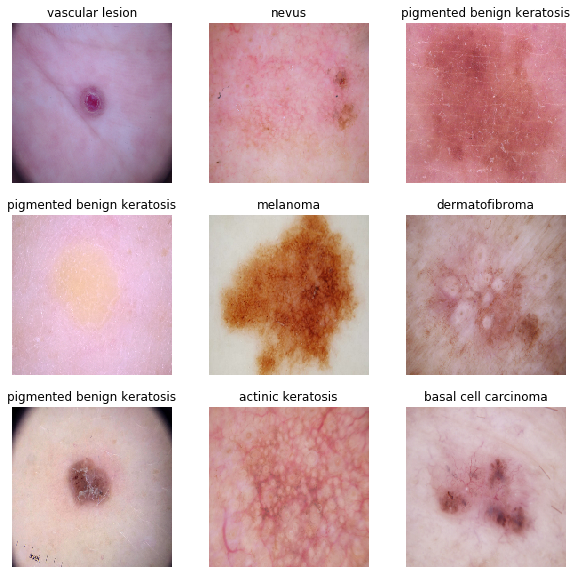

In [11]:
## Now we will visualize the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [12]:
### Now, we will measure the Size of tensor
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [13]:
### Now, we will keep the tensor in cache
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
### Now we will Build the Model
# So, before building the model we will rescale the data that will helps us to give equal importance to every pixel


num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [17]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 62s 738ms/step - loss: 2.0899 - accuracy: 0.1953 - val_loss: 1.9980 - val_accuracy: 0.3087
Epoch 2/20
56/56 [==============================] - 36s 644ms/step - loss: 1.9195 - accuracy: 0.2868 - val_loss: 2.0289 - val_accuracy: 0.3065
Epoch 3/20
56/56 [==============================] - 35s 619ms/step - loss: 1.6413 - accuracy: 0.4247 - val_loss: 1.5411 - val_accuracy: 0.4810
Epoch 4/20
56/56 [==============================] - 35s 618ms/step - loss: 1.4280 - accuracy: 0.5073 - val_loss: 1.4115 - val_accuracy: 0.5145
Epoch 5/20
56/56 [==============================] - 37s 667ms/step - loss: 1.3570 - accuracy: 0.5273 - val_loss: 1.4382 - val_accuracy: 0.5347
Epoch 6/20
56/56 [==============================] - 32s 578ms/step - loss: 1.2477 - accuracy: 0.5564 - val_loss: 1.4591 - val_accuracy: 0.5190
Epoch 7/20
56/56 [==============================] - 32s 575ms/step - loss: 1.1752 - accuracy: 0.5826 - val_loss: 1.4586 - val_accuracy: 0.5190

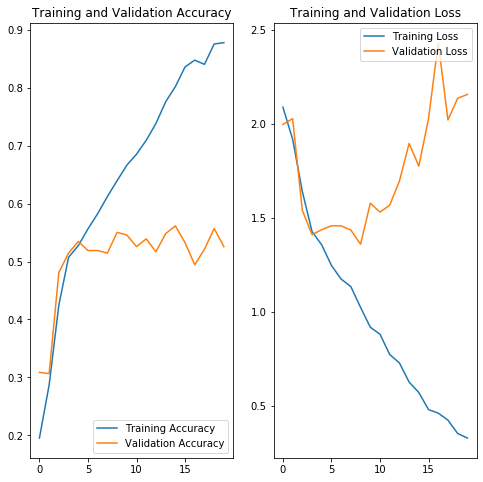

In [18]:
### Now, we will Visualizing the data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

As we can see the training accuracy  increases with each epochs and validation accuracy but is not increasing with each epochs. So,it can be  observed that **training accuracy is high compared to validation accuracy** which means that the  model has learned the training data and not generalised it.So,  It is a clear sign of **overfitting**. The Overfit model has very low accuracy on unseen data.

So,, we have to overcome overfitting of data and re- build the model

Techniques to overcome overfitting are

- Data Augumentation
- Dropout Regularization

Hence, we will try to implement the same in the above model.

In [19]:
### Now, we will Visualize the distribution of data
### Now, to view how data is distributed and check whether class imbalance is present or not.

In [20]:
### Now, we will plot the data distribution
def load_data_raw (path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), 9)
    
    return files, targets

train_filenames, train_targets = load_data_raw(data_dir_train1)

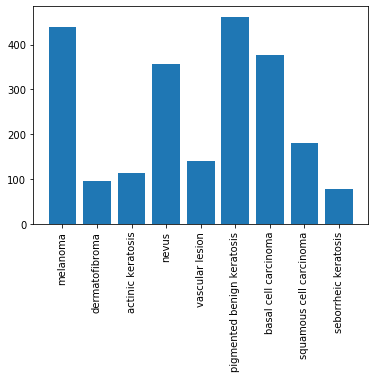

In [21]:
from collections import Counter
filenames_trimmed = [filename.split('\\')[-2] for filename in train_filenames]
classes_count = Counter(filenames_trimmed)

# Plot the classes
plt.bar(classes_count.keys(), classes_count.values())
plt.xticks(rotation = 90)
plt.show()

In [22]:
total = sum(classes_count.values())
for key,value in classes_count.items():
    classes_count[key] = (value/total)

                        Label  Percentage
0                    melanoma    0.195623
1              dermatofibroma    0.042430
2           actinic keratosis    0.050916
3                       nevus    0.159446
4             vascular lesion    0.062081
5  pigmented benign keratosis    0.206342
6        basal cell carcinoma    0.167932
7     squamous cell carcinoma    0.080840
8        seborrheic keratosis    0.034390


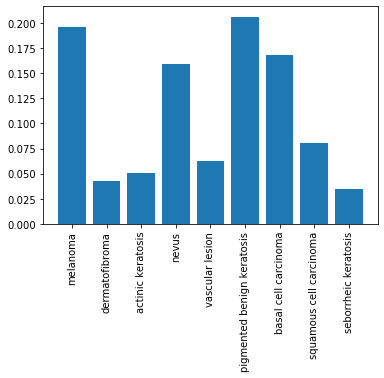

In [23]:
### Now, we will Plot the classes
print(pd.DataFrame(classes_count.items(),columns=['Label', 'Percentage']))
plt.bar(classes_count.keys(), classes_count.values())
plt.xticks(rotation = 90)
plt.show()

In [24]:
### Now, we will treat class imbalance

In [25]:
import Augmentor
path_to_training_dataset="./Skin cancer ISIC The International Skin Imaging Collaboration/Train"
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset+str("/") + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x201188B3648>: 100%|█| 500/500 [00:08<00:
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2011863ED48>: 100%|█| 500/500 [00:09<00:00, 55.42 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20118740BC8>: 100%|█| 500/500 [00:10<00:00, 48.36 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x20118B4EC08>: 100%|█| 500/500 [00:53<00:00,  9.33 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x20118B3B108>: 100%|█| 500/500 [00:50<00:
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x20118ADBA48>: 100%|█| 500/500 [00:08<00:
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x201187F9F08>: 100%|█| 500/500 [00:23<00:00, 21.69 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x201186F3688>: 100%|█| 500/500 [00:09<00:00, 51.67 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20118833548>: 100%|█| 500/500 [00:09<00:00, 52.09 Samples/


In [26]:
image_count_train1 = len(list(data_dir_train1.glob('*/output/*.jpg')))
print(image_count_train1)

4500


In [27]:
from glob import *
path_list_new = [x for x in glob(os.path.join(data_dir_train1, '*','output', '*.jpg'))]
path_list_new

['Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_26b3e8bd-bbbe-435d-8606-6c0f8c52fb14.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_2fc796a0-5eec-4753-9b29-f1ea60af4a95.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_4259fb24-4619-464f-9f6b-ac53f0aca310.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_5060e2a7-4455-4c33-afdd-e9a0b449fbb7.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_539a3c02-1997-481b-b856-5741696a993a.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train

In [28]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train1, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [29]:
### Now we will Build the model with augumented data

In [30]:
data_dir_train1 = pathlib.Path(r"Skin cancer ISIC The International Skin Imaging Collaboration\Train")
train_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size = (img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [31]:
### I Found 6739 files belonging to 9 classes.
### So we will use  5392 files for training.

In [32]:
val_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [33]:
### IFound 6739 files belonging to 9 classes.
### Now we will Use 1347 files for validation.

In [34]:
class_names = train_ds1.class_names
print("As we can see that we have 9 category in our dataset. They are as follows:\n")
for i,j in enumerate(class_names):
    print(str(i+1) + ' - ' + j)

As we can see that we have 9 category in our dataset. They are as follows:

1 - actinic keratosis
2 - basal cell carcinoma
3 - dermatofibroma
4 - melanoma
5 - nevus
6 - pigmented benign keratosis
7 - seborrheic keratosis
8 - squamous cell carcinoma
9 - vascular lesion


### Now we can see 9 category in the dataset.

1 - actinic keratosis

2 - basal cell carcinoma

3 - dermatofibroma

4 - melanoma

5 - nevus

6 - pigmented benign keratosis

7 - seborrheic keratosis

8 - squamous cell carcinoma

9 - vascular lesion

In [36]:
### Now, before building the model need to  rescale the data as it will help us to give equal importance to every pixel


num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),## normalization
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [39]:
### Now we will train the model
epochs=30
history = model.fit(
  train_ds1,
  validation_data=val_ds1,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 126s 725ms/step - loss: 1.9483 - accuracy: 0.2439 - val_loss: 1.8196 - val_accuracy: 0.3192
Epoch 2/30
169/169 [==============================] - 114s 674ms/step - loss: 1.5430 - accuracy: 0.4154 - val_loss: 1.3795 - val_accuracy: 0.4863
Epoch 3/30
169/169 [==============================] - 115s 676ms/step - loss: 1.3782 - accuracy: 0.4740 - val_loss: 1.3902 - val_accuracy: 0.4729
Epoch 4/30
169/169 [==============================] - 114s 672ms/step - loss: 1.2423 - accuracy: 0.5291 - val_loss: 1.1676 - val_accuracy: 0.5568
Epoch 5/30
169/169 [==============================] - 114s 673ms/step - loss: 1.0827 - accuracy: 0.5977 - val_loss: 1.1061 - val_accuracy: 0.5917
Epoch 6/30
169/169 [==============================] - 114s 672ms/step - loss: 0.9631 - accuracy: 0.6452 - val_loss: 0.9823 - val_accuracy: 0.6192
Epoch 7/30
169/169 [==============================] - 116s 681ms/step - loss: 0.8370 - accuracy: 0.6947 - val_loss: 0.9669 -

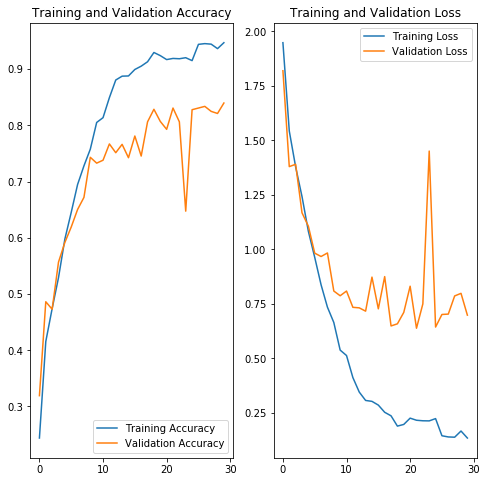

In [40]:
### Now we will Visualize the training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


####  We can see that we have reduced the overfitting as well as increased the training accuracy and validation accuracy with the help of sampling method.



## Conclusion


First of all we build a simple CNN model, got an training accuracy of  87% and validation accuracy of around 53%.So, It is a clear sign of overfitting.
We can see with the help of data augmented method and dropout regularization method, overfitting of the data can be reduced. In this case it has been reduced the overfitting, but decreased our training accuracy(approx. 63%) and validation accuracy(approx. 57%).
To increase the accuracy of both training and validation with overfitting in check, we used augmented sampling technique with dropout regularization.
So, the training accuracy has increased from around 63% to 94% approx. and validation accuracy from around 57% to 84% approx. with removal of overfitting.